# Machine Learning - Preço da habitação

*__Problema a ser resolvido__*
> *Prever o preço da habitação com base em certos fatores como área da casa, quartos, móveis, proximidade da estrada principal, etc*

<ul style="border: 4px solid #525444	; background-color: #AEBF3F	; width: 40em;">  
    <li style="background-color: #AEBF3F;
               display: block;
               padding: 5px;
               "><h2>Etapas do Machine Learning</h2></li>
    <li style="background-color: #DCDCDC;
               display: block;
               padding: 5px;
               border: 1px solid #AEBF3F;
               "><h4>Conhecimento dos dados e pré processamento</h4></li>
    <li style="background-color: #DCDCDC;
               display: block;
               padding: 5px;
               border: 1px solid #AEBF3F;
               "><a href="#obtencao">Obtenção e visualização dos dados</a></li>
    <li style="background-color: #DCDCDC;
               display: block;
               padding: 5px;
               border: 1px solid #AEBF3F;
               "><a href="#processamento">Pré processamento e seleção das variáveis</a></li>
    <li style="background-color: #DCDCDC;
               display: block;
               padding: 5px;
               border: 1px solid #AEBF3F;
               "><h4>Aplicação e avaliação dos modelos</h4></li>
    <li style="background-color: #DCDCDC;
               display: block;
               padding: 5px;
               border: 1px solid #AEBF3F;
               "><a href="#modelo">Função com vários modelos</a></li>
    <li style="background-color: #DCDCDC;
               display: block;
               padding: 5px;
               border: 1px solid #AEBF3F;
               "><a href="#pycaret">AutoML - PyCaret</a></li>
</ul>

<hr>

<section id="obtencao">

### Obtenção e visualização dos dados

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Lendo o arquivo CSV
base_original = pd.read_csv("dataset/Housing.csv")

In [4]:
# Vendo a quantidade de linhas e colunas
base_original.shape

(545, 13)

In [5]:
# Visualizando as 5 primeiras e 5 últimas linhas da base
display(base_original)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [6]:
# Dividindo o preço por 10 para separar o decimal
base_original.price = base_original['price'] / 10
base_original['price']

0      1330000.0
1      1225000.0
2      1225000.0
3      1221500.0
4      1141000.0
         ...    
540     182000.0
541     176715.0
542     175000.0
543     175000.0
544     175000.0
Name: price, Length: 545, dtype: float64

In [7]:
# Adicionando uma nova coluna com o valor do metro quadrado
base_original['preco_m2'] = base_original.price / base_original.area
base_original.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,preco_m2
540,182000.0,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,60.666667
541,176715.0,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,73.631250
542,175000.0,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,48.342541
543,175000.0,2910,3,1,1,no,no,no,no,no,0,no,furnished,60.137457
544,175000.0,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished,45.454545


In [8]:
base_original.preco_m2.min(), base_original.preco_m2.max()

(27.03955500618047, 264.0)

c:\Users\thimorae\AppData\Local\anaconda3\envs\PyCaret\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


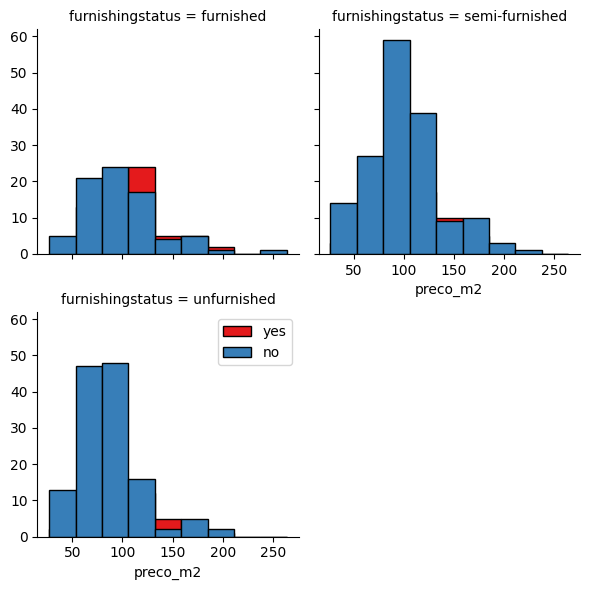

In [9]:
bins = np.linspace(base_original.preco_m2.min(), base_original.preco_m2.max(), 10)
g = sns.FacetGrid(base_original, col="furnishingstatus", hue="airconditioning", palette="Set1", col_wrap=2)
g.map(plt.hist, 'preco_m2', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [10]:
# Verificando a quantidade de habitações mobiliada, semi-mobiliada e sem mobilia
base_original.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [11]:
# Verificando valores nulos e quais são os tipos de dados
base_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    float64
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    object 
 6   guestroom         545 non-null    object 
 7   basement          545 non-null    object 
 8   hotwaterheating   545 non-null    object 
 9   airconditioning   545 non-null    object 
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    object 
 12  furnishingstatus  545 non-null    object 
 13  preco_m2          545 non-null    float64
dtypes: float64(2), int64(5), object(7)
memory usage: 59.7+ KB


In [12]:
# Analisando as informações estatísticas
base_original.describe()

,price,area,bedrooms,bathrooms,stories,parking,preco_m2
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+05,5150.541284,2.965138,1.286239,1.805505,0.693578,99.332698
std,1.870440e+05,2170.141023,0.738064,0.502470,0.867492,0.861586,34.653702
min,1.750000e+05,1650.000000,1.000000,1.000000,1.000000,0.000000,27.039555
25%,3.430000e+05,3600.000000,2.000000,1.000000,1.000000,0.000000,74.537037
50%,4.340000e+05,4600.000000,3.000000,1.000000,2.000000,0.000000,95.238095
75%,5.740000e+05,6360.000000,3.000000,2.000000,2.000000,1.000000,118.461538
max,1.330000e+06,16200.000000,6.000000,4.000000,4.000000,3.000000,264.000000


In [13]:
base_original[base_original['preco_m2'] == 73.631250]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,preco_m2
541,176715.0,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,73.63125


In [14]:
# Visualizar a distribuição e valores discrepantes (outliers) dos dados
outliers = px.box(base_original, x = 'preco_m2', points='all', height=400)
outliers.show()

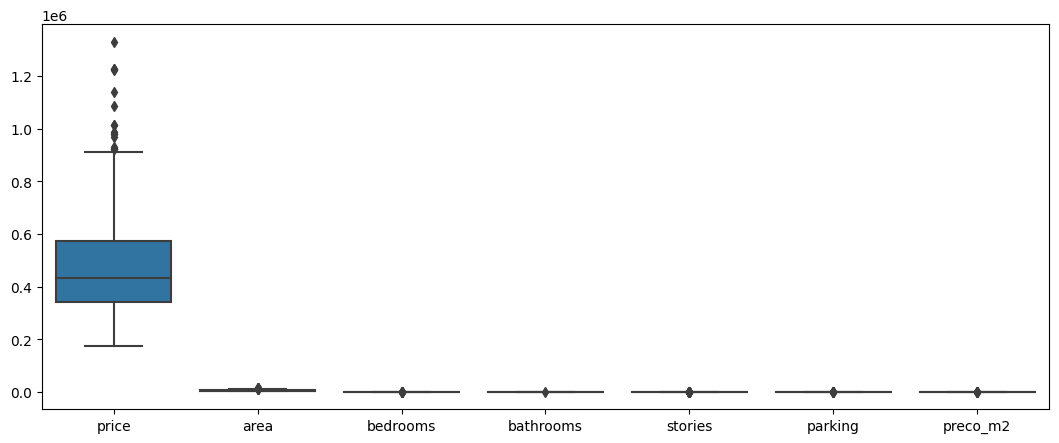

In [15]:
# Visualizando a discrepacia dos valores das colunas numéricas
plt.figure(figsize =(13, 5))
ax = sns.boxplot(data=base_original)

In [16]:
# Verificando a existencia de valores nulos
base_original.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
preco_m2            0
dtype: int64

In [17]:
# Verificando se tem valores duplicados
base_original[base_original.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,preco_m2


<section id="processamento">
    
### Pré processamento e seleção das variáveis

In [18]:
# Criando outra variável com os dados da tabela sem os outliers do preço
base_casas = base_original.drop(base_original.index[0:19])
base_casas.shape

(526, 14)

In [19]:
# Removendo os outliers da área e do preço por m2
df_apagar = base_casas.loc[base_casas['area'] > 10360]
base_casas = base_casas.drop(df_apagar.index)

df_apagar = base_casas.loc[base_casas['preco_m2'] > 180.0000]
base_casas = base_casas.drop(df_apagar.index)

base_casas.shape

(502, 14)

In [20]:
base_casas.loc[base_casas.preco_m2 > 150.0000]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,preco_m2
29,840000.0,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished,152.727273
32,829500.0,4880,4,2,2,yes,no,no,no,yes,1,yes,furnished,169.979508
48,745500.0,4300,3,2,2,yes,no,yes,no,no,1,no,unfurnished,173.372093
70,679000.0,4000,3,2,2,yes,no,yes,no,yes,0,yes,semi-furnished,169.750000
74,665000.0,4040,3,1,2,yes,no,yes,yes,no,1,no,furnished,164.603960
75,665000.0,4260,4,2,2,yes,no,no,yes,no,0,no,semi-furnished,156.103286
81,661500.0,4000,3,2,2,yes,no,yes,no,yes,1,no,semi-furnished,165.375000
84,651000.0,3760,3,1,2,yes,no,no,yes,no,2,no,semi-furnished,173.138298
87,647500.0,3960,3,1,1,yes,no,yes,no,no,2,no,semi-furnished,163.510101
95,630000.0,4100,3,2,3,yes,no,no,no,yes,2,no,semi-furnished,153.658537


In [21]:
# Analisando as informações estatísticas sem os outliers
base_casas.describe()

,price,area,bedrooms,bathrooms,stories,parking,preco_m2
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,452017.916335,4926.671315,2.926295,1.256972,1.782869,0.647410,96.856532
std,154217.975678,1759.650163,0.729029,0.463973,0.867847,0.843659,29.776459
min,175000.000000,1700.000000,1.000000,1.000000,1.000000,0.000000,31.818182
25%,336875.000000,3588.000000,2.000000,1.000000,1.000000,0.000000,75.382726
50%,420000.000000,4500.000000,3.000000,1.000000,2.000000,0.000000,94.474062
75%,551600.000000,6060.000000,3.000000,1.000000,2.000000,1.000000,114.595616
max,885500.000000,10360.000000,6.000000,3.000000,4.000000,3.000000,178.431373


<Axes: >

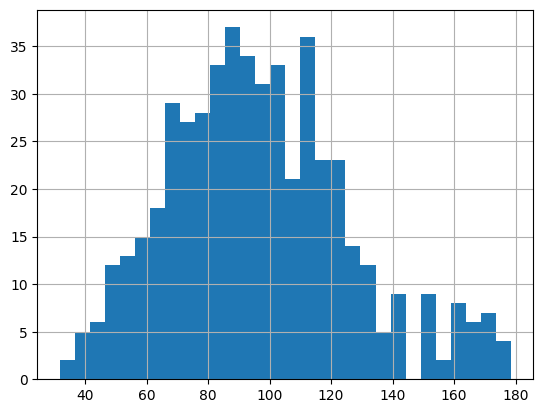

In [22]:
# Comportamento da coluna ao longo do tempo
base_casas.preco_m2.hist(bins=30)

In [23]:
# Converte dados categóricos ou em formato de texto para valores numéricos
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding
base_casas['mainroad'] = lab.fit_transform(base_casas['mainroad'])
base_casas['guestroom'] = lab.fit_transform(base_casas['guestroom'])
base_casas['basement'] = lab.fit_transform(base_casas['basement'])
base_casas['hotwaterheating'] = lab.fit_transform(base_casas['hotwaterheating'])
base_casas['airconditioning'] = lab.fit_transform(base_casas['airconditioning'])
base_casas['prefarea'] = lab.fit_transform(base_casas['prefarea'])
base_casas['furnishingstatus'] = lab.fit_transform(base_casas['furnishingstatus'])

#view updated DataFrame
base_casas.dtypes

price               float64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int32
guestroom             int32
basement              int32
hotwaterheating       int32
airconditioning       int32
parking               int64
prefarea              int32
furnishingstatus      int32
preco_m2            float64
dtype: object

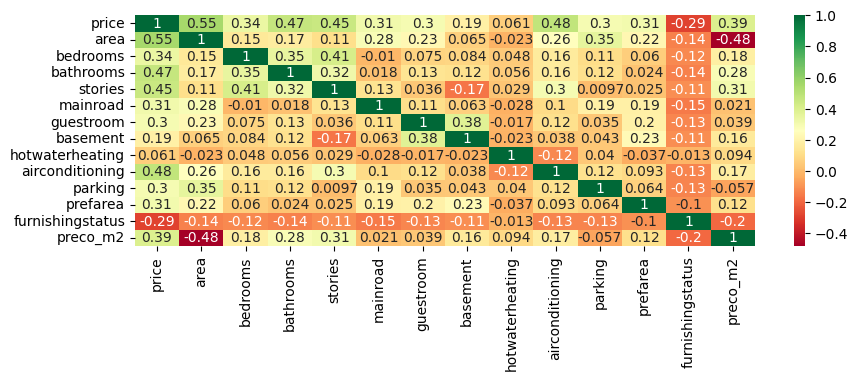

In [24]:
# Visualizando a correlação entre as variáveis através do mapa de calor
fig, ax = plt.subplots(figsize=(10,3))
sns.heatmap(base_casas.corr(),annot=True, cmap='RdYlGn')
plt.show()

<section id="modelo">

### Função com vários modelos

In [25]:
# Selecionando as colunas do eixo X
X_casas = base_casas.iloc[:, 1:].values

# Selecionando a coluna do eixo y
y_casas = base_casas.iloc[:, 0].values

In [26]:
# Dividindo a base em treino e teste de forma aleatória
from sklearn.model_selection import train_test_split
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X_casas, y_casas, test_size = 0.3, random_state = 0)

In [27]:
X_casas_treinamento.shape, X_casas_teste.shape

((351, 13), (151, 13))

In [28]:
# Dimensionamento de recursos para garantir que os recursos estejam quase na mesma escala, 
# para que cada recurso seja igualmente importante 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modelos não baseados em Árvores de Decisão se beneficiam mais dos tipos de padronização dessa função.
def dimensionamento(dimensao):
    if dimensao == 'pad':
        # Padroniza as features removendo a média e escala a variância a uma unidade.
        padronizar = StandardScaler()
        X_casas_treinamento_scaled = padronizar.fit_transform(X_casas_treinamento)
        y_casas_treinamento_scaled = padronizar.fit_transform(y_casas_treinamento.reshape(-1,1))
        return (X_casas_treinamento_scaled, y_casas_treinamento_scaled, padronizar)
    elif dimensao == 'nor':
        # Traduz cada feature individualmente de forma que esta estará em um 
        # determinado intervalo no conjunto de treino, por exemplo, entre zero e um.
        normalizar = MinMaxScaler()
        X_casas_treinamento_scaled = normalizar.fit_transform(X_casas_treinamento)
        y_casas_treinamento_scaled = normalizar.fit_transform(y_casas_treinamento.reshape(-1,1))
        return (X_casas_treinamento_scaled, y_casas_treinamento_scaled, normalizar)
    else:
        return (X_casas_treinamento, y_casas_treinamento, StandardScaler())
    
dados_escalados = dimensionamento('pad')

In [29]:
X, y, scaler_casas = dados_escalados

In [30]:
y

array([[-1.00201204],
       [ 0.50267948],
       [ 0.10914478],
       [ 0.66472319],
       [ 2.09996741],
       [ 1.17400339],
       [ 2.19256381],
       [ 0.15544298],
       [ 2.35192222],
       [-1.2705416 ],
       [-0.49273183],
       [ 1.26659979],
       [-0.77052104],
       [-0.81681924],
       [ 1.05825789],
       [-0.95571384],
       [-0.77052104],
       [-1.83537965],
       [-1.37239765],
       [-1.23350304],
       [ 0.31748668],
       [-1.41869585],
       [-0.72422284],
       [-0.67792464],
       [-1.00201204],
       [-0.14549533],
       [ 1.4054944 ],
       [-0.08067785],
       [-1.04831024],
       [-0.86311744],
       [ 0.27118848],
       [ 0.82676689],
       [-0.49736165],
       [ 1.26659979],
       [-0.67792464],
       [ 0.1600728 ],
       [-1.00201204],
       [-1.09460844],
       [-0.90941564],
       [ 0.98881059],
       [-1.46499405],
       [-0.58532823],
       [ 0.94251239],
       [-0.44643363],
       [-1.23813286],
       [-0

In [31]:
X.shape, y.shape

((351, 13), (351, 1))

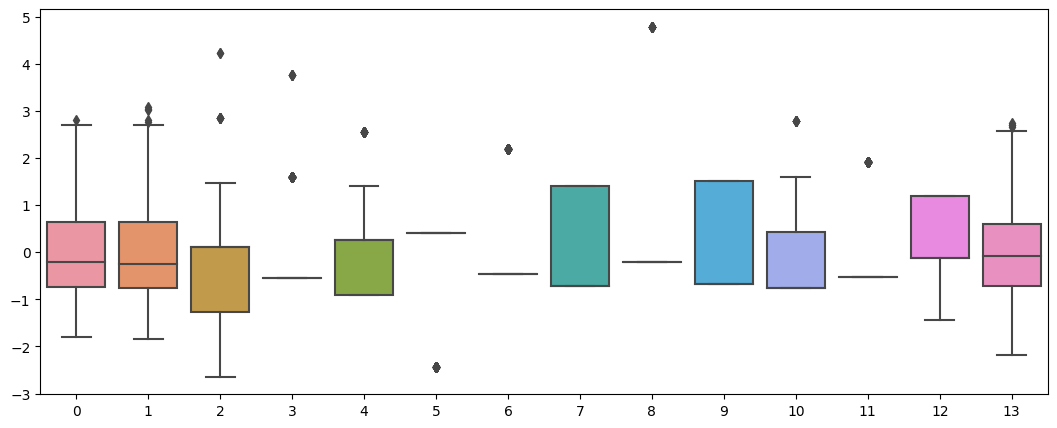

In [32]:
# Discrepacia dos valores das colunas tratado (agora todas as colunas são numéricas)
df_std = scaler_casas.fit_transform(base_casas)
plt.figure(figsize =(13, 5))
ax = sns.boxplot(data=df_std)

In [33]:
# Analisando as informações estatísticas com os dados na mesma escala
base_casas = pd.DataFrame(X)
base_casas.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,3.510000e+02,351.000000,3.510000e+02,3.510000e+02
mean,-9.109522e-17,2.530423e-16,-6.579099e-17,-5.566930e-17,-7.338226e-17,-9.362565e-17,6.579099e-17,-1.012169e-17,-4.807803e-17,-2.024338e-17,0.000000,4.554761e-17,-1.069104e-15
std,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00,1.001428e+00,1.001428,1.001428e+00,1.001428e+00
min,-1.818740e+00,-2.707358e+00,-5.593464e-01,-9.247378e-01,-2.319875e+00,-4.722251e-01,-7.390910e-01,-1.712469e-01,-6.666667e-01,-7.516101e-01,-0.530115,-1.423388e+00,-2.191933e+00
25%,-7.748311e-01,5.108223e-02,-5.593464e-01,-9.247378e-01,4.310578e-01,-4.722251e-01,-7.390910e-01,-1.712469e-01,-6.666667e-01,-7.516101e-01,-0.530115,-7.625293e-01,-7.471931e-01
50%,-2.556677e-01,5.108223e-02,-5.593464e-01,2.221985e-01,4.310578e-01,-4.722251e-01,-7.390910e-01,-1.712469e-01,-6.666667e-01,-7.516101e-01,-0.530115,-1.016706e-01,-1.042344e-01
75%,7.072967e-01,5.108223e-02,-5.593464e-01,2.221985e-01,4.310578e-01,-4.722251e-01,1.353013e+00,-1.712469e-01,1.500000e+00,4.261361e-01,-0.530115,1.220047e+00,6.259190e-01
max,2.964820e+00,4.188743e+00,3.755611e+00,2.516071e+00,4.310578e-01,2.117634e+00,1.353013e+00,5.839521e+00,1.500000e+00,2.781629e+00,1.886383,1.220047e+00,2.718076e+00


In [34]:
# Ajustando os dados de teste e fazendo o dimensionamento
X_casas_teste_scaled = scaler_casas.fit_transform(X_casas_teste)
y_casas_teste_scaled = scaler_casas.fit_transform(y_casas_teste.reshape(-1,1))

In [35]:
X_casas_teste_scaled.shape, y_casas_teste_scaled.shape 

((151, 13), (151, 1))

In [36]:
X_casas_teste_scaled

array([[-0.68875088,  1.59038343, -0.54296796, ..., -0.50826502,
        -1.48892805,  2.1037381 ],
       [ 0.99749991,  0.21810973,  1.61461526, ..., -0.50826502,
        -1.48892805, -0.20544694],
       [-1.10658293, -1.15416398, -0.54296796, ..., -0.50826502,
        -1.48892805,  0.79439051],
       ...,
       [ 0.46924081, -1.15416398, -0.54296796, ..., -0.50826502,
        -0.17414363, -1.06872183],
       [ 0.68412587,  0.21810973,  1.61461526, ...,  1.96747751,
        -0.17414363,  1.44833224],
       [ 0.26629381,  1.59038343,  1.61461526, ...,  1.96747751,
         1.14064079,  0.0555393 ]])

In [37]:
np.set_printoptions(precision=4, threshold=5, edgeitems=3, suppress=True)
y_casas_teste_scaled

array([[ 0.8976],
       [ 0.8976],
       [-0.5413],
       ...,
       [-0.5195],
       [ 2.463 ],
       [ 0.4616]])

In [38]:
# Função para treinar e testar os modelos
from sklearn.metrics import mean_absolute_error

def treinamento(modelo, X_treinamento=X, y_treinamento=y.ravel(),
                X_teste=X_casas_teste_scaled, y_teste=y_casas_teste_scaled):
    regressor = modelo
    
    # Ajustando a regressão ao conjunto de dados
    regressor.fit(X_treinamento, y_treinamento)
    
    previsoes = regressor.predict(X_teste)

    print('\n')
    print('Valores previstos:\n', previsoes)
    print('\n')
    print('Resultados do teste:\n', X_teste)
    print('\n')
    
    return [regressor, regressor.score(X_treinamento, y_treinamento), regressor.score(X_teste, y_teste),
            mean_absolute_error(y_teste, previsoes)]

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

# Ajustando a regressão polinomial ao conjunto de dados
X_casas_treinamento_poly = poly.fit_transform(X)
X_casas_teste_poly = poly.transform(X_casas_teste_scaled)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

modelos = {
           'REGRESSÃO MULTILINEAR': LinearRegression(),
           'REGRESSÃO POLINOMIAL': LinearRegression(),
           'ARVORE DE DECISÃO': DecisionTreeRegressor(),
           'FLORESTA ALEATÓRIA': RandomForestRegressor(n_estimators=100), 
           'REGRESSÃO COM VETORES': SVR(kernel='rbf'), 
           'REDES NEURAIS ARTIFICIAIS': MLPRegressor(max_iter=1000, hidden_layer_sizes=(15,15))
}
arr = [[],[]]

for nome, modelo in modelos.items():
    print(nome)
    arr[0].append(nome)
    if nome == 'REGRESSÃO POLINOMIAL':
        arr[1].append(treinamento(modelo, X_treinamento=X_casas_treinamento_poly, X_teste=X_casas_teste_poly))
    else:
        arr[1].append(treinamento(modelo))

r1 = []
r2 = []
r3 = []
for i in arr[1]:
    r1.append(i[1])
    r2.append(i[2])
    r3.append(i[3])
array = np.array([[r1[0], r2[0], r3[0]], [r1[1], r2[1], r3[1]], [r1[2], r2[2], r3[2]],
                 [r1[3], r2[3], r3[3]], [r1[4], r2[4], r3[4]], [r1[5], r2[5], r3[5]]])
df = pd.DataFrame(data=array, columns=['% Acertos no treino','% Acertos no teste','Erro absoluto'], index=[arr[0]])

REGRESSÃO MULTILINEAR


Valores previstos:
 [ 1.2987  0.9095 -0.2021 ... -0.7127  2.2251  0.519 ]


Resultados do teste:
 [[-0.6888  1.5904 -0.543  ... -0.5083 -1.4889  2.1037]
 [ 0.9975  0.2181  1.6146 ... -0.5083 -1.4889 -0.2054]
 [-1.1066 -1.1542 -0.543  ... -0.5083 -1.4889  0.7944]
 ...
 [ 0.4692 -1.1542 -0.543  ... -0.5083 -0.1741 -1.0687]
 [ 0.6841  0.2181  1.6146 ...  1.9675 -0.1741  1.4483]
 [ 0.2663  1.5904  1.6146 ...  1.9675  1.1406  0.0555]]


REGRESSÃO POLINOMIAL


Valores previstos:
 [ 0.8984  1.0655 -0.6374 ... -0.4814  2.7334  0.5484]


Resultados do teste:
 [[ 1.     -0.6888  1.5904 ...  2.2169 -3.1323  4.4257]
 [ 1.      0.9975  0.2181 ...  2.2169  0.3059  0.0422]
 [ 1.     -1.1066 -1.1542 ...  2.2169 -1.1828  0.6311]
 ...
 [ 1.      0.4692 -1.1542 ...  0.0303  0.1861  1.1422]
 [ 1.      0.6841  0.2181 ...  0.0303 -0.2522  2.0977]
 [ 1.      0.2663  1.5904 ...  1.3011  0.0634  0.0031]]


ARVORE DE DECISÃO


Valores previstos:
 [ 0.4101  0.9888 -0.4696 ... -0.5437  2.2

In [41]:
df

,% Acertos no treino,% Acertos no teste,Erro absoluto
REGRESSÃO MULTILINEAR,0.891764,0.882246,0.249974
REGRESSÃO POLINOMIAL,1.000000,0.973327,0.118158
ARVORE DE DECISÃO,1.000000,0.943142,0.177440
FLORESTA ALEATÓRIA,0.995105,0.977652,0.111375
REGRESSÃO COM VETORES,0.982300,0.864968,0.229219
REDES NEURAIS ARTIFICIAIS,0.971579,0.930069,0.202061


In [42]:
print('Análise da Regressão Multilinear\n')
print(f'Ponto onde a regressão estimada cruza o eixo y quando x=0\nInterceptor: {arr[1][0][0].intercept_}')
print('\nVeja o quanto a variação em y pode ser explicada pela dependência em x.') 
print('Quanto maior o coeficiente, maior a indicação de que o modelo se encaixou ou acertou (better fit)')
print(f'Coeficientes de determinação: {arr[1][0][0].coef_}\n')
print(f'Quantidade de coeficientes: {len(arr[1][0][0].coef_)}\n')

Análise da Regressão Multilinear

Ponto onde a regressão estimada cruza o eixo y quando x=0
Interceptor: 9.046193547898086e-16

Veja o quanto a variação em y pode ser explicada pela dependência em x.
Quanto maior o coeficiente, maior a indicação de que o modelo se encaixou ou acertou (better fit)
Coeficientes de determinação: [ 0.8606  0.0054  0.0688 ... -0.0014  0.0032  0.7563]

Quantidade de coeficientes: 13



<section id="pycaret">

### AutoML - PyCaret

In [43]:
base_casas.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
346,-1.026039,0.051082,-0.559346,0.222198,-2.319875,-0.472225,1.353013,5.839521,-0.666667,-0.751610,-0.530115,-0.101671,0.745909
347,0.581693,-1.328138,-0.559346,-0.924738,0.431058,-0.472225,1.353013,-0.171247,1.500000,0.426136,-0.530115,-1.423388,-0.624440
348,0.782659,0.051082,-0.559346,1.369135,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,-0.751610,1.886383,-0.101671,-0.290178
349,0.034617,0.051082,-0.559346,2.516071,0.431058,-0.472225,-0.739091,-0.171247,1.500000,-0.751610,1.886383,1.220047,1.259247
350,0.470045,-1.328138,-0.559346,-0.924738,0.431058,2.117634,1.353013,-0.171247,1.500000,-0.751610,-0.530115,-0.101671,-0.410832


In [44]:
from pycaret.regression import *
s = setup(base_casas, target = 0)

,Description,Value
0,Session id,6819
1,Target,0
2,Target type,Regression
3,Original data shape,"(351, 13)"
4,Transformed data shape,"(351, 13)"
5,Transformed train set shape,"(245, 13)"
6,Transformed test set shape,"(106, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [45]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.4477,0.3829,0.6170,0.6109,0.2805,1.2319,0.1070
rf,Random Forest Regressor,0.4670,0.3966,0.6265,0.6020,0.2781,1.5463,0.1480
lightgbm,Light Gradient Boosting Machine,0.4775,0.4014,0.6315,0.5947,0.2943,1.7353,0.1500
et,Extra Trees Regressor,0.4749,0.4180,0.6404,0.5796,0.2817,1.6910,0.1440
br,Bayesian Ridge,0.4968,0.4342,0.6566,0.5713,0.3078,3.2909,0.0210
ridge,Ridge Regression,0.4965,0.4351,0.6574,0.5694,0.3063,3.4112,0.0310
lr,Linear Regression,0.4966,0.4355,0.6576,0.5689,0.3060,3.4323,0.7360
lar,Least Angle Regression,0.4966,0.4355,0.6576,0.5689,0.3060,3.4323,0.0340
huber,Huber Regressor,0.4971,0.4376,0.6589,0.5679,0.3097,3.1113,0.0200
ada,AdaBoost Regressor,0.5439,0.4787,0.6893,0.5217,0.3224,2.8845,0.0800


In [46]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

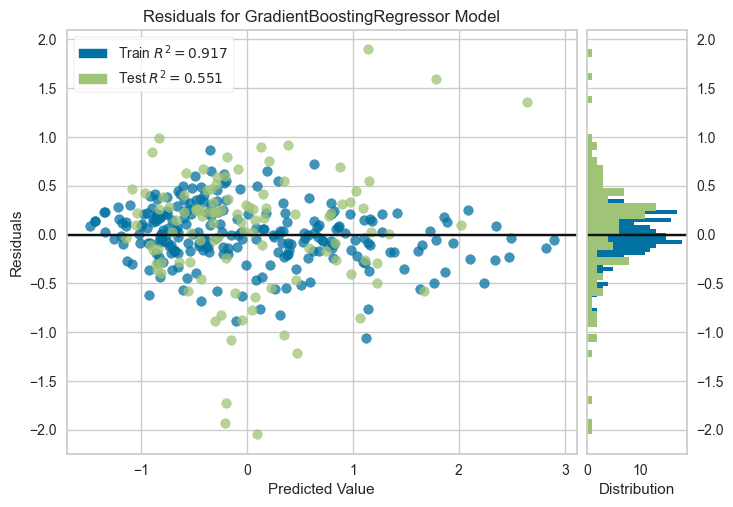

In [47]:
plot_model(best, plot = 'residuals')

In [48]:
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.4603,0.3874,0.6224,0.5509,0.3015,1.5178


,1,2,3,4,5,6,7,8,9,10,11,12,0,prediction_label
320,-1.328138,1.598132,-0.924738,-2.319875,2.117634,1.353013,-0.171247,-0.666667,0.426136,-0.530115,1.220047,-0.595358,-0.542603,-0.180190
200,0.051082,1.598132,0.222198,0.431058,-0.472225,-0.739091,-0.171247,1.500000,0.426136,-0.530115,-0.101671,-0.180127,-0.199844,0.351959
209,1.430302,-0.559346,0.222198,0.431058,-0.472225,-0.739091,-0.171247,1.500000,-0.751610,-0.530115,-0.101671,-0.252569,-0.181980,-0.051668
182,0.051082,-0.559346,0.222198,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,-0.751610,-0.530115,-0.101671,1.041832,-0.808326,-0.911902
329,0.051082,-0.559346,-0.924738,-2.319875,-0.472225,-0.739091,-0.171247,1.500000,-0.751610,1.886383,1.220047,-1.843120,0.190925,1.784333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,0.051082,-0.559346,2.516071,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,-0.751610,-0.530115,-1.423388,0.519794,0.023452,0.046002
129,1.430302,-0.559346,0.222198,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,-0.751610,-0.530115,-0.101671,-0.694775,-0.199844,0.060953
268,0.051082,-0.559346,0.222198,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,0.426136,-0.530115,-0.101671,-0.357702,-0.065866,-0.030628
251,0.051082,-0.559346,1.369135,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,-0.751610,-0.530115,1.220047,0.658650,-0.445469,-0.322708


In [49]:
predictions = predict_model(best, data=base_casas)
predictions.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,prediction_label
0,-1.185138,-1.328138,-0.559346,-0.924738,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,-0.751610,-0.530115,-0.101671,0.322721,-0.974391
1,-0.199844,-1.328138,1.598132,-0.924738,0.431058,-0.472225,-0.739091,-0.171247,1.500000,1.603882,-0.530115,-0.101671,0.617577,0.012502
2,-0.356151,0.051082,-0.559346,-0.924738,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,-0.751610,1.886383,-0.101671,0.403617,-0.408399
3,-0.925556,0.051082,3.755611,0.222198,0.431058,-0.472225,1.353013,-0.171247,-0.666667,-0.751610,-0.530115,-0.101671,2.399351,-1.010319
4,0.581693,1.430302,1.598132,2.516071,0.431058,-0.472225,-0.739091,-0.171247,-0.666667,1.603882,-0.530115,-0.101671,1.072183,0.549494


In [50]:
save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\thimorae\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['1', '2', '3', '4', '5', '6', '7',
                                              '8', '9', '10', '11', '12'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  GradientBoostingRegressor(random_state=6819))]),
 'my_best_pipeline.pkl')

In [51]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\thimorae\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['1', '2', '3', '4', '5', '6', '7',
                                             '8', '9', '10', '11', '12'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 GradientBoostingRegressor(random_state=6819))])


### Referências

+ [Machine Learning e Data Science com Python de A a Z](https://capgemini.udemy.com/course/machine-learning-e-data-science-com-python-y)
+ [ANÁLISE EXPLORATÓRIA EM PYTHON – COMO ANALISAR SEUS DADOS?](https://www.hashtagtreinamentos.com/analise-exploratoria-em-python-ciencia-dados)
+ [Etapas do Machine Learning](https://didatica.tech/etapas-do-machine-learning)
+ [Etapas de um sistema de aprendizagem de máquina](https://maquinasqueaprendem.com/2020/04/08/etapas-de-um-sistema-de-aprendizagem-de-maquina)
+ [Quick start guide to PyCaret](https://pycaret.gitbook.io/docs/get-started/quickstart#regression)
+ [Append 2D Array in Python](https://www.delftstack.com/howto/python/append-2d-array-python/)
+ [Diferentes formas de criar um DataFrame](https://www.walissonsilva.com/posts/diferentes-formas-de-criar-um-dataframe)